In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
twitter_consumer_key = "JYnQ2CAFTcb46d4NTdcXW2KPF"
twitter_consumer_secret = "d04j2F4kLe5Dkesjn929830U81C8j6ERTZWlJL39GXp7T08pFR"  
twitter_access_token = "1414827534504534019-IO0CDza0e4XPYxaWnunaS4FBeQfrma"
twitter_access_secret = "6euG6suIoXhTJOyMr3CthvOShIiBT9bajEg05cG6OF2D5"

import twitter

twitter_api = twitter.Api(consumer_key=twitter_consumer_key,
                          consumer_secret=twitter_consumer_secret, 
                          access_token_key=twitter_access_token, 
                          access_token_secret=twitter_access_secret)

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\choi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 🧲 특정 계정 트위터 긁어오기

In [4]:
account = "@VitalikButerin"
statuses = twitter_api.GetUserTimeline(screen_name=account, count=200, include_rts=True, exclude_replies=False)
# print(statuses)

tweets = []

for status in statuses:
    tweets.append({"created_at" : status.created_at, "text" : status.text})
    print(status.created_at, status.text)
#     print(status.text.encode('utf-8'))

Mon Aug 02 10:54:55 +0000 2021 RT @pussyrrriot: Founder of Ethereum @VitalikButerin on decentralization, global warming, gas fees, the future of ETH, and what he will be…
Thu Jul 29 11:58:57 +0000 2021 RT @epicenterbtc: 🚀NEW EPISODE🚀
@seb2point0 and @sunnya97 talk to @VitalikButerin about #Ethereum and its potential to change our society i…
Thu Jul 29 05:26:18 +0000 2021 Against overuse of the Gini coefficient:

https://t.co/G6sCj75w9R
Tue Jul 20 15:03:00 +0000 2021 Retroactive public goods funding!

Collaboration with the @optimismPBC team. Big thanks to them for also being will… https://t.co/d4vxWKNShN
Tue Jul 20 14:10:55 +0000 2021 During the last few weeks there has been a lot of discussion around the possibility of miners running custom softwa… https://t.co/wgXiAIB0F7
Thu Jul 01 15:43:53 +0000 2021 The https://t.co/TNujIpuuq2 online summit has started!

I will be speaking on block space markets in Ethereum shard… https://t.co/PjTeb16LdG
Wed Jun 23 13:00:50 +0000 2021 EF research t

In [5]:
tweets

[{'created_at': 'Mon Aug 02 10:54:55 +0000 2021',
  'text': 'RT @pussyrrriot: Founder of Ethereum @VitalikButerin on decentralization, global warming, gas fees, the future of ETH, and what he will be…'},
 {'created_at': 'Thu Jul 29 11:58:57 +0000 2021',
  'text': 'RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 and @sunnya97 talk to @VitalikButerin about #Ethereum and its potential to change our society i…'},
 {'created_at': 'Thu Jul 29 05:26:18 +0000 2021',
  'text': 'Against overuse of the Gini coefficient:\n\nhttps://t.co/G6sCj75w9R'},
 {'created_at': 'Tue Jul 20 15:03:00 +0000 2021',
  'text': 'Retroactive public goods funding!\n\nCollaboration with the @optimismPBC team. Big thanks to them for also being will… https://t.co/d4vxWKNShN'},
 {'created_at': 'Tue Jul 20 14:10:55 +0000 2021',
  'text': 'During the last few weeks there has been a lot of discussion around the possibility of miners running custom softwa… https://t.co/wgXiAIB0F7'},
 {'created_at': 'Thu Jul 01 15:43:53 +0000 202

In [6]:
len(tweets)

200

In [7]:
# Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    #print(tweet.text)

    tweet_list.append(tweet['text'])
    analysis = TextBlob(tweet['text'])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet['text'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet['text'])
        negative += 1
    elif pos > neg:
        positive_list.append(tweet['text'])
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet['text'])
        neutral += 1
        
positive = percentage(positive, len(tweets))
negative = percentage(negative, len(tweets))
neutral = percentage(neutral, len(tweets))
polarity = percentage(polarity, len(tweets))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [8]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  200
positive number:  82
negative number:  43
neutral number:  75


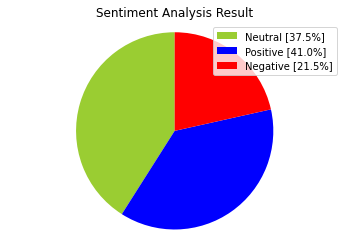

In [9]:
#Creating PieCart

labels = ['Neutral ['+str(neutral)+'%]', 'Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result' )
plt.axis('equal')
plt.show()

In [10]:
tweet_list

,0
0,RT @pussyrrriot: Founder of Ethereum @VitalikB...
1,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...
2,Against overuse of the Gini coefficient:\n\nht...
3,Retroactive public goods funding!\n\nCollabora...
4,During the last few weeks there has been a lot...
...,...
195,"@twobitidiot @vorot93 ""War on misinformation"" ..."
196,"@vjsingh102 But fair, that would have been har..."
197,@vjsingh102 It's actually not that mathematica...
198,Is it necessarily a bad thing if a protocol op...


In [11]:
pd_tweets = pd.DataFrame(tweets)
pd_tweets

,created_at,text
0,Mon Aug 02 10:54:55 +0000 2021,RT @pussyrrriot: Founder of Ethereum @VitalikB...
1,Thu Jul 29 11:58:57 +0000 2021,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...
2,Thu Jul 29 05:26:18 +0000 2021,Against overuse of the Gini coefficient:\n\nht...
3,Tue Jul 20 15:03:00 +0000 2021,Retroactive public goods funding!\n\nCollabora...
4,Tue Jul 20 14:10:55 +0000 2021,During the last few weeks there has been a lot...
...,...,...
195,Mon Nov 30 11:34:41 +0000 2020,"@twobitidiot @vorot93 ""War on misinformation"" ..."
196,Mon Nov 30 10:43:48 +0000 2020,"@vjsingh102 But fair, that would have been har..."
197,Mon Nov 30 10:42:38 +0000 2020,@vjsingh102 It's actually not that mathematica...
198,Mon Nov 30 09:58:44 +0000 2020,Is it necessarily a bad thing if a protocol op...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(pd_tweets)
tw_list['text_processed'] = tw_list['text']

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ' ,x)
rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\+:\/\/\S+)',' ' ,x)
tw_list['text_processed'] = tw_list.text_processed.map(remove_rt).map(rt)
tw_list['text_processed'] = tw_list.text_processed.str.lower()
tw_list

,created_at,text,text_processed
0,Mon Aug 02 10:54:55 +0000 2021,RT @pussyrrriot: Founder of Ethereum @VitalikB...,founder of ethereum on decentralization gl...
1,Thu Jul 29 11:58:57 +0000 2021,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...,new episode point and talk to about...
2,Thu Jul 29 05:26:18 +0000 2021,Against overuse of the Gini coefficient:\n\nht...,against overuse of the gini coefficient http...
3,Tue Jul 20 15:03:00 +0000 2021,Retroactive public goods funding!\n\nCollabora...,retroactive public goods funding collaborati...
4,Tue Jul 20 14:10:55 +0000 2021,During the last few weeks there has been a lot...,during the last few weeks there has been a lot...
...,...,...,...
195,Mon Nov 30 11:34:41 +0000 2020,"@twobitidiot @vorot93 ""War on misinformation"" ...",war on misinformation probably fits bet...
196,Mon Nov 30 10:43:48 +0000 2020,"@vjsingh102 But fair, that would have been har...",but fair that would have been harder for...
197,Mon Nov 30 10:42:38 +0000 2020,@vjsingh102 It's actually not that mathematica...,it s actually not that mathematically har...
198,Mon Nov 30 09:58:44 +0000 2020,Is it necessarily a bad thing if a protocol op...,is it necessarily a bad thing if a protocol op...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text_processed'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list

,created_at,text,text_processed,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Mon Aug 02 10:54:55 +0000 2021,RT @pussyrrriot: Founder of Ethereum @VitalikB...,founder of ethereum on decentralization gl...,0.000000,0.062500,positive,0.000,0.914,0.086,0.1531
1,Thu Jul 29 11:58:57 +0000 2021,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...,new episode point and talk to about...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
2,Thu Jul 29 05:26:18 +0000 2021,Against overuse of the Gini coefficient:\n\nht...,against overuse of the gini coefficient http...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,Tue Jul 20 15:03:00 +0000 2021,Retroactive public goods funding!\n\nCollabora...,retroactive public goods funding collaborati...,0.066667,0.122222,positive,0.000,0.861,0.139,0.4404
4,Tue Jul 20 14:10:55 +0000 2021,During the last few weeks there has been a lot...,during the last few weeks there has been a lot...,-0.100000,0.083333,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
195,Mon Nov 30 11:34:41 +0000 2020,"@twobitidiot @vorot93 ""War on misinformation"" ...",war on misinformation probably fits bet...,0.500000,0.500000,negative,0.411,0.397,0.192,-0.5106
196,Mon Nov 30 10:43:48 +0000 2020,"@vjsingh102 But fair, that would have been har...",but fair that would have been harder for...,0.152500,0.460000,positive,0.000,0.826,0.174,0.4497
197,Mon Nov 30 10:42:38 +0000 2020,@vjsingh102 It's actually not that mathematica...,it s actually not that mathematically har...,0.168750,0.585417,positive,0.000,0.657,0.343,0.7000
198,Mon Nov 30 09:58:44 +0000 2020,Is it necessarily a bad thing if a protocol op...,is it necessarily a bad thing if a protocol op...,-0.295833,0.388889,negative,0.150,0.730,0.120,-0.1779


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [15]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,87,43.5
neutral,68,34.0
negative,45,22.5


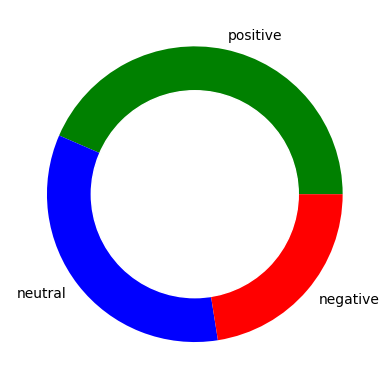

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list, 'sentiment')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green', 'blue', 'red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## 📈 가격 데이터와 연결짓기

In [17]:
import pyupbit
from matplotlib import rcParams

print(pyupbit.get_tickers())

['KRW-BTC', 'KRW-ETH', 'BTC-ETH', 'BTC-LTC', 'BTC-XRP', 'BTC-ETC', 'BTC-OMG', 'BTC-CVC', 'BTC-DGB', 'BTC-SC', 'BTC-SNT', 'BTC-WAVES', 'BTC-NMR', 'BTC-XEM', 'BTC-QTUM', 'BTC-BAT', 'BTC-LSK', 'BTC-STEEM', 'BTC-DOGE', 'BTC-BNT', 'BTC-XLM', 'BTC-ARDR', 'BTC-ARK', 'BTC-STORJ', 'BTC-GRS', 'BTC-REP', 'BTC-RLC', 'USDT-BTC', 'USDT-ETH', 'USDT-LTC', 'USDT-XRP', 'USDT-ETC', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC', 'KRW-XRP', 'KRW-ETC', 'KRW-OMG', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-REP', 'KRW-ADA', 'BTC-ADA', 'BTC-MANA', 'USDT-OMG', 'KRW-SBD', 'BTC-SBD', 'KRW-POWR', 'BTC-POWR', 'KRW-BTG', 'USDT-ADA', 'BTC-DNT', 'BTC-ZRX', 'BTC-TRX', 'BTC-TUSD', 'BTC-LRC', 'KRW-ICX', 'KRW-EOS', 'USDT-TUSD', 'KRW-TRX', 'BTC-POLY', 'USDT-SC', 'USDT-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLY', 'KRW-ZRX', 'KRW-LOOM', 'BTC-BCH', 'USDT-BCH', 'KRW-BCH', 'BTC-MFT', 'BTC-LOOM', 'KRW-BAT', 'KRW-IOST', 'BTC-RFR', 'KRW-RFR', 'USDT-D

In [18]:
df = pyupbit.get_ohlcv("KRW-ETH", count=400)
df = pd.DataFrame(df)
df = df.drop(['value'], axis=1)
# df = df.reset_index()
# df['index'] = df.apply(lambda x: x['index'][:10], axis=1)
df

,open,high,low,close,volume
2020-07-02 09:00:00,276200.0,277350.0,268550.0,271400.0,44643.463618
2020-07-03 09:00:00,271050.0,273150.0,268850.0,269250.0,36843.243059
2020-07-04 09:00:00,269050.0,275000.0,268850.0,272950.0,21287.699618
2020-07-05 09:00:00,272950.0,273650.0,267900.0,271850.0,25537.691147
2020-07-06 09:00:00,271850.0,286650.0,270450.0,286000.0,61326.150183
...,...,...,...,...,...
2021-08-01 09:00:00,2927000.0,3129000.0,2910000.0,2967000.0,134818.025120
2021-08-02 09:00:00,2966000.0,3086000.0,2890000.0,3023000.0,126683.714630
2021-08-03 09:00:00,3024000.0,3057000.0,2865000.0,2948000.0,111835.250077
2021-08-04 09:00:00,2948000.0,3176000.0,2880000.0,3136000.0,140962.334305


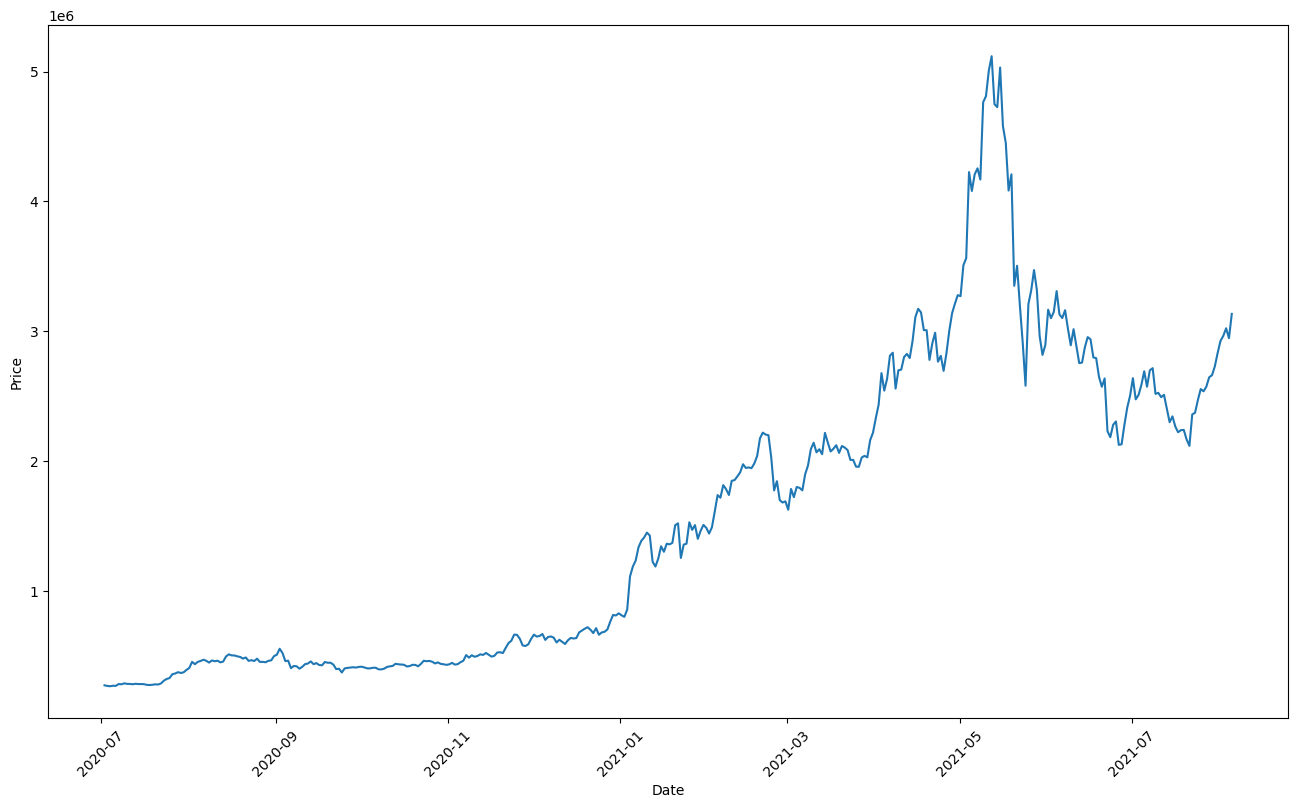

In [19]:
rcParams['figure.figsize'] = 16,9

plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation="45")
ax = sns.lineplot(data=df['open'])

plt.show()

In [20]:
# Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
tw_list['created_at']

0      Mon Aug 02 10:54:55 +0000 2021
1      Thu Jul 29 11:58:57 +0000 2021
2      Thu Jul 29 05:26:18 +0000 2021
3      Tue Jul 20 15:03:00 +0000 2021
4      Tue Jul 20 14:10:55 +0000 2021
                    ...              
195    Mon Nov 30 11:34:41 +0000 2020
196    Mon Nov 30 10:43:48 +0000 2020
197    Mon Nov 30 10:42:38 +0000 2020
198    Mon Nov 30 09:58:44 +0000 2020
199    Mon Nov 30 09:49:39 +0000 2020
Name: created_at, Length: 200, dtype: object

In [21]:
def month_trans(tw_list):
    
    tw_list['created_at'] = tw_list['created_at'].replace('Jan', '001')
    tw_list['created_at'] = tw_list['created_at'].replace('Feb', '002')
    tw_list['created_at'] = tw_list['created_at'].replace('Mar', '003')
    tw_list['created_at'] = tw_list['created_at'].replace('Apr', '004')
    tw_list['created_at'] = tw_list['created_at'].replace('May', '005')
    tw_list['created_at'] = tw_list['created_at'].replace('Jun', '006')
    tw_list['created_at'] = tw_list['created_at'].replace('Jul', '007')
    tw_list['created_at'] = tw_list['created_at'].replace('Aug', '008')
    tw_list['created_at'] = tw_list['created_at'].replace('Sep', '009')
    tw_list['created_at'] = tw_list['created_at'].replace('Oct', '010')
    tw_list['created_at'] = tw_list['created_at'].replace('Nov', '011')
    tw_list['created_at'] = tw_list['created_at'].replace('Dec', '012')
    
    return tw_list['created_at']

In [22]:
tw_list['created_at'] = tw_list.apply(month_trans, axis=1)
tw_list

,created_at,text,text_processed,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Mon 008 02 10:54:55 +0000 2021,RT @pussyrrriot: Founder of Ethereum @VitalikB...,founder of ethereum on decentralization gl...,0.000000,0.062500,positive,0.000,0.914,0.086,0.1531
1,Thu 007 29 11:58:57 +0000 2021,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...,new episode point and talk to about...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
2,Thu 007 29 05:26:18 +0000 2021,Against overuse of the Gini coefficient:\n\nht...,against overuse of the gini coefficient http...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,Tue 007 20 15:03:00 +0000 2021,Retroactive public goods funding!\n\nCollabora...,retroactive public goods funding collaborati...,0.066667,0.122222,positive,0.000,0.861,0.139,0.4404
4,Tue 007 20 14:10:55 +0000 2021,During the last few weeks there has been a lot...,during the last few weeks there has been a lot...,-0.100000,0.083333,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
195,Mon 011 30 11:34:41 +0000 2020,"@twobitidiot @vorot93 ""War on misinformation"" ...",war on misinformation probably fits bet...,0.500000,0.500000,negative,0.411,0.397,0.192,-0.5106
196,Mon 011 30 10:43:48 +0000 2020,"@vjsingh102 But fair, that would have been har...",but fair that would have been harder for...,0.152500,0.460000,positive,0.000,0.826,0.174,0.4497
197,Mon 011 30 10:42:38 +0000 2020,@vjsingh102 It's actually not that mathematica...,it s actually not that mathematically har...,0.168750,0.585417,positive,0.000,0.657,0.343,0.7000
198,Mon 011 30 09:58:44 +0000 2020,Is it necessarily a bad thing if a protocol op...,is it necessarily a bad thing if a protocol op...,-0.295833,0.388889,negative,0.150,0.730,0.120,-0.1779


In [23]:
from datetime import datetime

def to_datetime(tw_list):
#     s = tw_list['created_at'][-4:]+'-'+tw_list['created_at'][5:7]+'-'+tw_list['created_at'][8:10]+' '+tw_list['created_at'][11:19]
    
    # 하루데이터로 묶기
    s = tw_list['created_at'][-4:]+'-'+tw_list['created_at'][5:7]+'-'+tw_list['created_at'][8:10]+' '+'09:00:00'
    s = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
    return s
#     tw_list['created_at'] = 

In [24]:
tw_list['created_at'] = tw_list.apply(to_datetime, axis=1)
tw_list

,created_at,text,text_processed,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2021-08-02 09:00:00,RT @pussyrrriot: Founder of Ethereum @VitalikB...,founder of ethereum on decentralization gl...,0.000000,0.062500,positive,0.000,0.914,0.086,0.1531
1,2021-07-29 09:00:00,RT @epicenterbtc: 🚀NEW EPISODE🚀\n@seb2point0 a...,new episode point and talk to about...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
2,2021-07-29 09:00:00,Against overuse of the Gini coefficient:\n\nht...,against overuse of the gini coefficient http...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,2021-07-20 09:00:00,Retroactive public goods funding!\n\nCollabora...,retroactive public goods funding collaborati...,0.066667,0.122222,positive,0.000,0.861,0.139,0.4404
4,2021-07-20 09:00:00,During the last few weeks there has been a lot...,during the last few weeks there has been a lot...,-0.100000,0.083333,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
195,2020-11-30 09:00:00,"@twobitidiot @vorot93 ""War on misinformation"" ...",war on misinformation probably fits bet...,0.500000,0.500000,negative,0.411,0.397,0.192,-0.5106
196,2020-11-30 09:00:00,"@vjsingh102 But fair, that would have been har...",but fair that would have been harder for...,0.152500,0.460000,positive,0.000,0.826,0.174,0.4497
197,2020-11-30 09:00:00,@vjsingh102 It's actually not that mathematica...,it s actually not that mathematically har...,0.168750,0.585417,positive,0.000,0.657,0.343,0.7000
198,2020-11-30 09:00:00,Is it necessarily a bad thing if a protocol op...,is it necessarily a bad thing if a protocol op...,-0.295833,0.388889,negative,0.150,0.730,0.120,-0.1779


In [25]:
tw_group = tw_list.groupby('created_at').mean()
tw_group

,polarity,subjectivity,neg,neu,pos,compound
created_at,,,,,,
2020-11-30 09:00:00,0.194265,0.272361,0.073118,0.787118,0.139765,0.171400
2020-12-01 09:00:00,0.059082,0.301274,0.052185,0.856926,0.090963,0.060100
2020-12-06 09:00:00,-0.038864,0.530455,0.089000,0.819800,0.091200,0.029130
2020-12-07 09:00:00,0.027500,0.291250,0.027250,0.877250,0.095500,0.159025
2020-12-09 09:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2020-12-14 09:00:00,0.053472,0.277050,0.049857,0.874762,0.075333,0.113295
2020-12-15 09:00:00,0.216667,0.450000,0.000000,0.673000,0.327000,0.700300
2020-12-16 09:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2020-12-20 09:00:00,0.117014,0.361458,0.036833,0.845000,0.118333,0.207967


In [26]:
def sentiment_analysis(tw_group):
    zxcv = max(tw_group['pos'], tw_group['neu'], tw_group['neg'])
    if tw_group['pos'] == zxcv:
        return 'pos'
    elif tw_group['neu'] == zxcv:
        return 'neu'
    elif tw_group['neg'] == zxcv:
        return 'neg'
    
# def sentiment_analysis(tw_group):
#     if tw_group['pos'] > tw_group['neg']:
#         return 'pos'
#     elif tw_group['pos'] < tw_group['neg']:
#         return 'neg'
    
    
tw_group['sentiment'] = tw_group.apply(sentiment_analysis, axis=1)
tw_group

,polarity,subjectivity,neg,neu,pos,compound,sentiment
created_at,,,,,,,
2020-11-30 09:00:00,0.194265,0.272361,0.073118,0.787118,0.139765,0.171400,neu
2020-12-01 09:00:00,0.059082,0.301274,0.052185,0.856926,0.090963,0.060100,neu
2020-12-06 09:00:00,-0.038864,0.530455,0.089000,0.819800,0.091200,0.029130,neu
2020-12-07 09:00:00,0.027500,0.291250,0.027250,0.877250,0.095500,0.159025,neu
2020-12-09 09:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,neu
2020-12-14 09:00:00,0.053472,0.277050,0.049857,0.874762,0.075333,0.113295,neu
2020-12-15 09:00:00,0.216667,0.450000,0.000000,0.673000,0.327000,0.700300,neu
2020-12-16 09:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,neu
2020-12-20 09:00:00,0.117014,0.361458,0.036833,0.845000,0.118333,0.207967,neu


In [27]:
result = pd.merge(df.reset_index().rename({'index' : 'created_at'}, axis=1), tw_group.reset_index(), how='right', on='created_at')[['created_at', 'open', 'sentiment']]
result

,created_at,open,sentiment
0,2020-11-30 09:00:00,633700.0,neu
1,2020-12-01 09:00:00,666000.0,neu
2,2020-12-06 09:00:00,648200.0,neu
3,2020-12-07 09:00:00,652000.0,neu
4,2020-12-09 09:00:00,605900.0,neu
5,2020-12-14 09:00:00,640500.0,neu
6,2020-12-15 09:00:00,636500.0,neu
7,2020-12-16 09:00:00,639700.0,neu
8,2020-12-20 09:00:00,723200.0,neu
9,2020-12-21 09:00:00,704000.0,neu


In [28]:
result = result.set_index('created_at')
result

,open,sentiment
created_at,,
2020-11-30 09:00:00,633700.0,neu
2020-12-01 09:00:00,666000.0,neu
2020-12-06 09:00:00,648200.0,neu
2020-12-07 09:00:00,652000.0,neu
2020-12-09 09:00:00,605900.0,neu
2020-12-14 09:00:00,640500.0,neu
2020-12-15 09:00:00,636500.0,neu
2020-12-16 09:00:00,639700.0,neu
2020-12-20 09:00:00,723200.0,neu


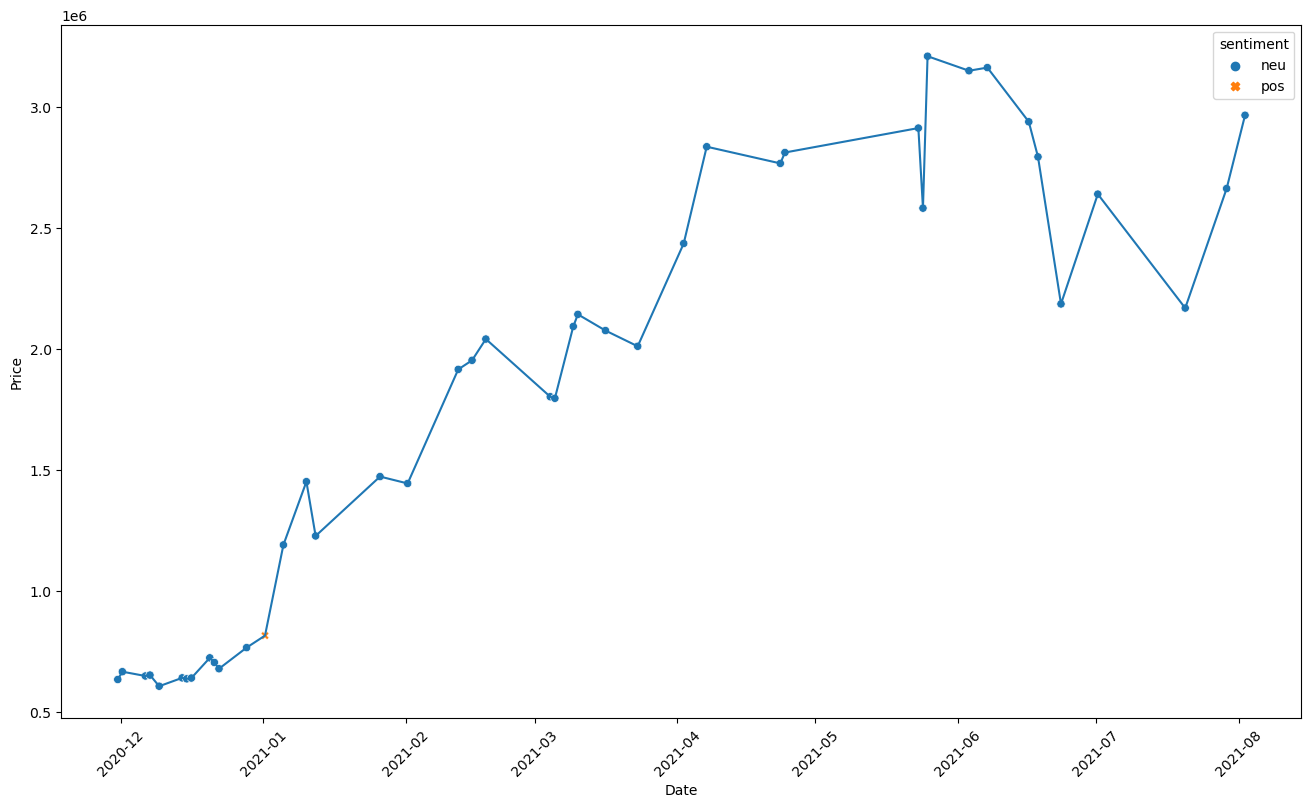

In [29]:
rcParams['figure.figsize'] = 16,9

plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation="45")
# ax = sns.lineplot(data=df['open'])
ax = sns.lineplot(data=result['open'])
ax = sns.scatterplot(data=result, x='created_at', y='open', hue='sentiment', style='sentiment')
plt.show()